All libraries imported successfully!
Dataset loaded successfully!
Total emails: 5572

Class distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Balance ratio: 6.46:1 (Ham:Spam)
Text preprocessing completed!
Sentiment features extracted!

VISUALIZATION 1: CLASS DISTRIBUTION ANALYSIS


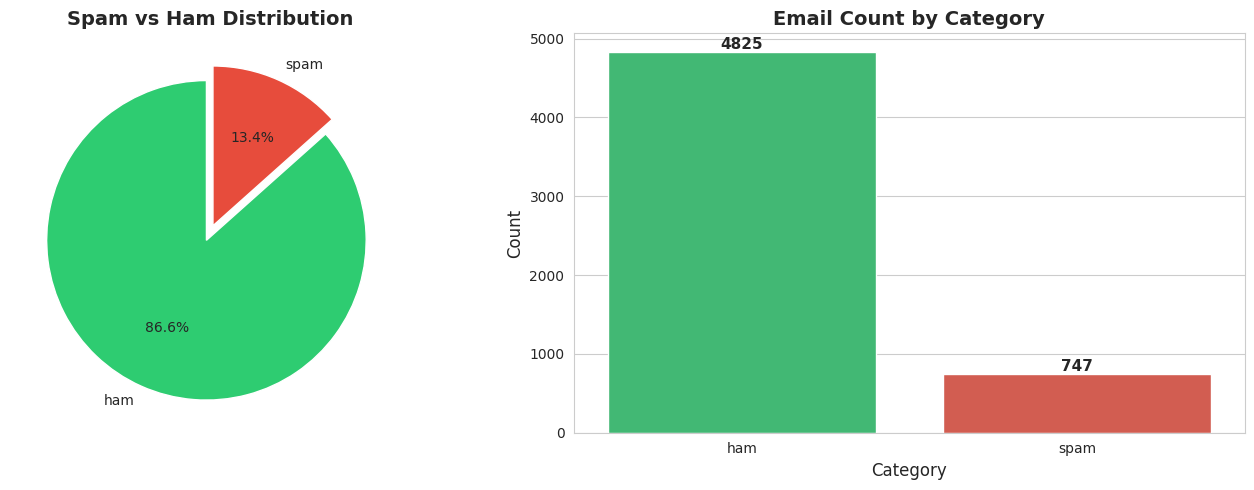


 INSIGHT:
   • Dataset is IMBALANCED: 4825 ham vs 747 spam emails
   • This means ~86.6% are legitimate emails
   • Real-world scenario: Most emails are legitimate, so high accuracy isn't enough!
   • We need to focus on RECALL for spam (catching actual spam) to avoid false negatives

VISUALIZATION 2: MESSAGE LENGTH PATTERNS


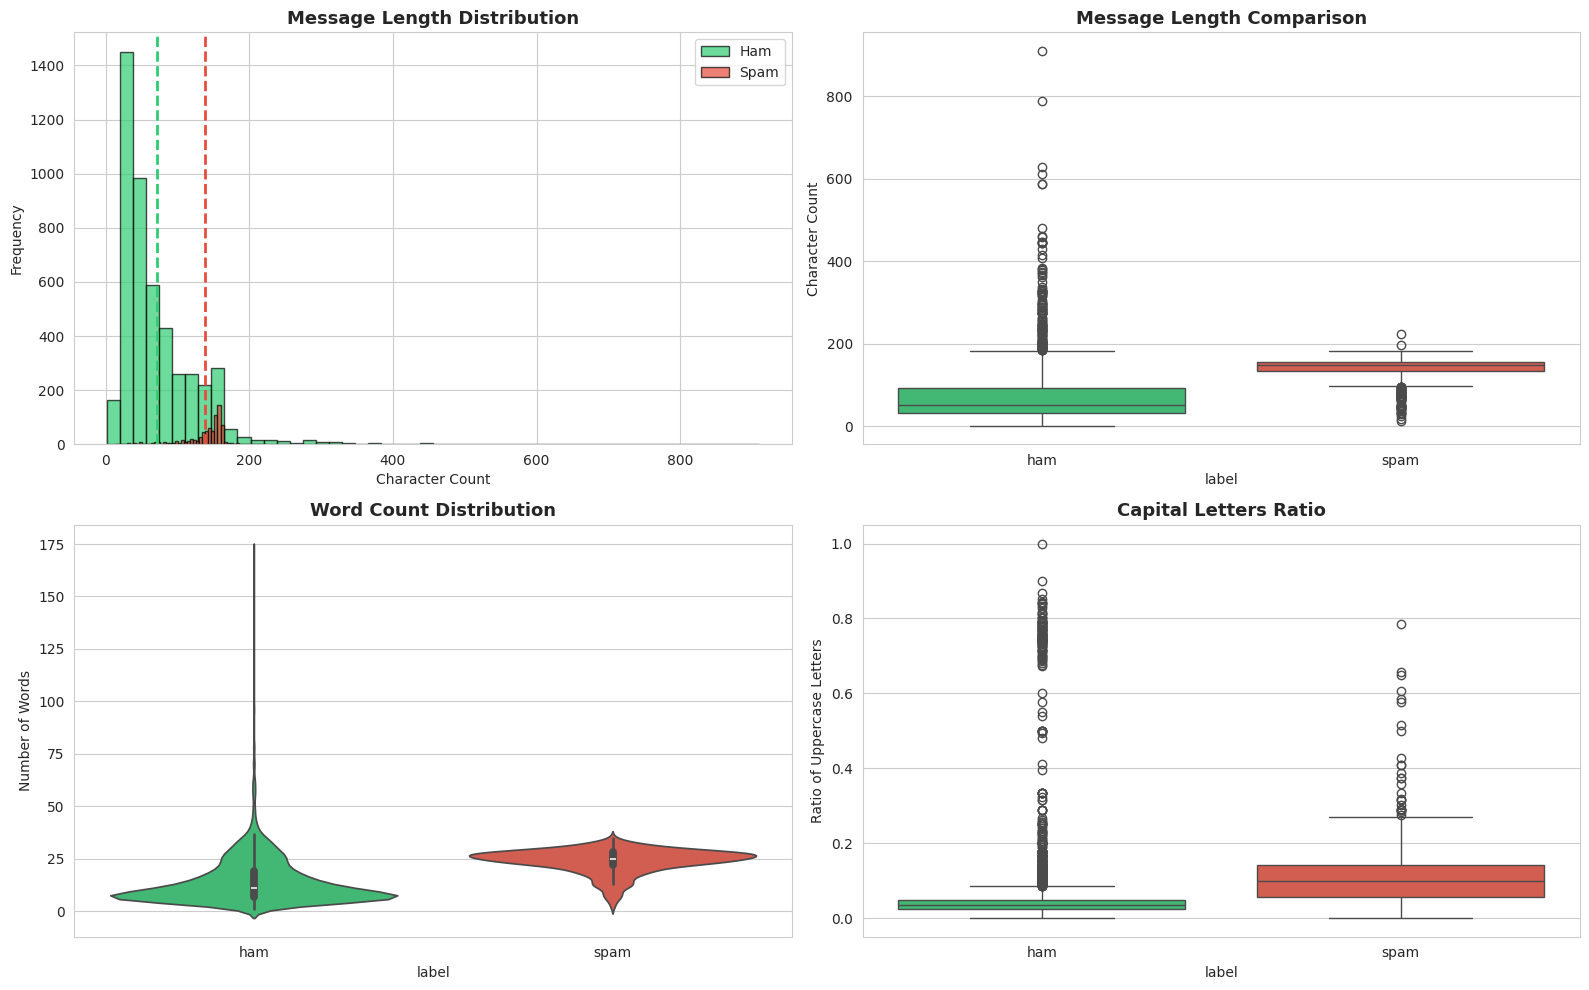


 STATISTICAL COMPARISON:

Message Length:
   Ham  - Mean: 71.5, Median: 52.0
   Spam - Mean: 138.7, Median: 149.0

Word Count:
   Ham  - Mean: 14.3, Median: 11.0
   Spam - Mean: 23.9, Median: 25.0

 KEY INSIGHTS:
   • Spam messages are typically LONGER than ham (139 vs 71 chars)
   • Spam uses 1.9x MORE capital letters (urgency tactic!)
   • Spam has higher variance in length (more diverse tactics)

 VISUALIZATION 3: SPAM INDICATORS (!, ?, URLs, Money)


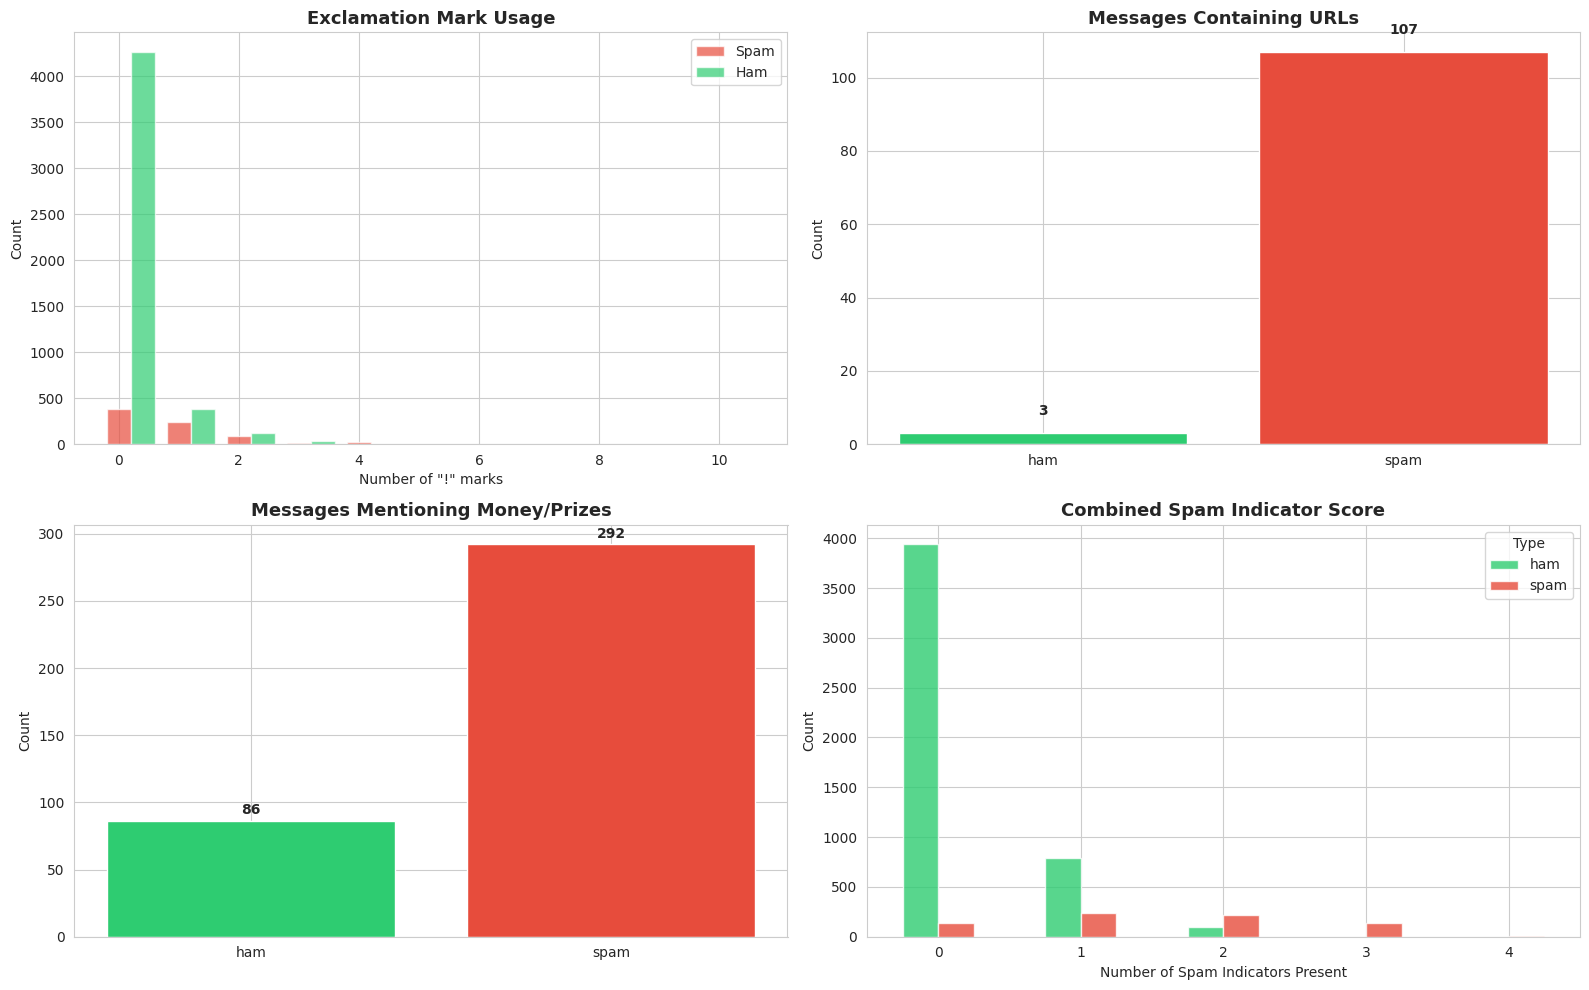


 KEY INSIGHTS:
   • 545 exclamation marks in spam vs 852 in ham!
   • 39.1% of spam mentions money vs 1.8% of ham
   • URLs appear in 14.3% of spam vs 0.1% of ham
   • Spam uses multiple urgency tactics combined (!!!, money, URLs, CAPS)

 VISUALIZATION 5: MOST COMMON WORDS (Word Clouds)


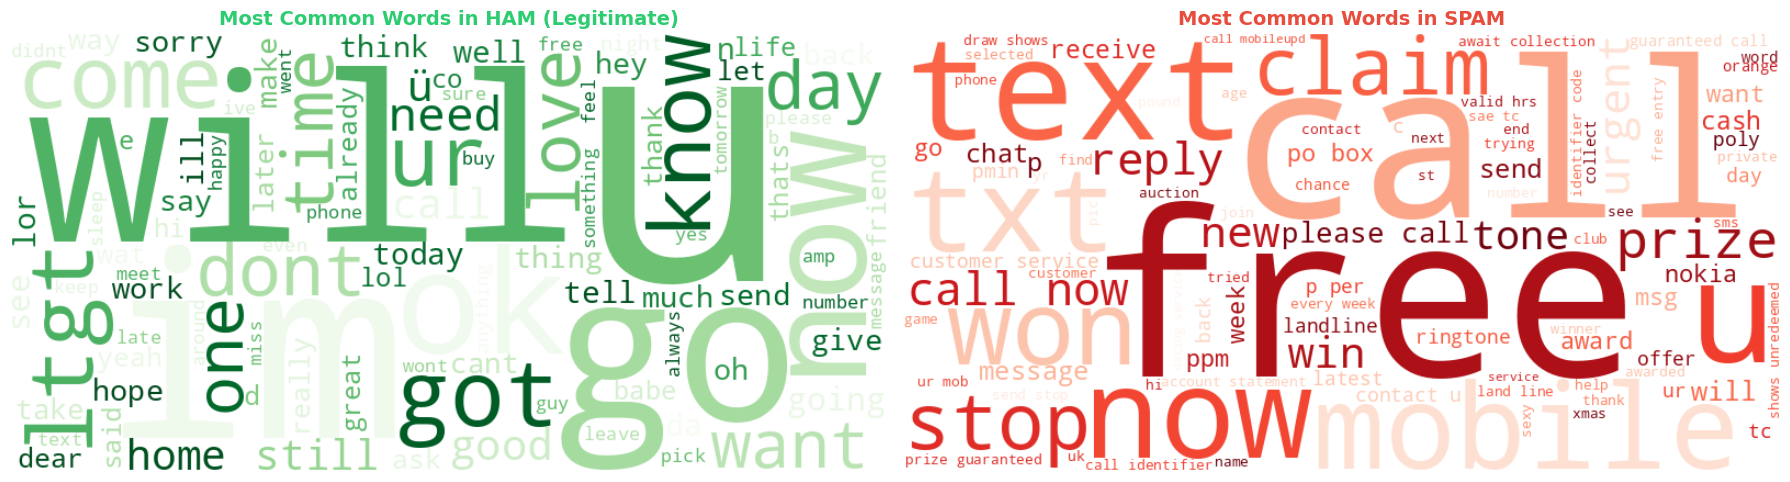


 TOP 15 WORDS COMPARISON:

HAM (Legitimate)          |  SPAM
--------------------------------------------------
just            (290) | free            (219)
ltgt            (276) | txt             (150)
dont            (265) | mobile          (124)
ill             (238) | text            (121)
got             (233) | stop            (118)
know            (232) | claim           (113)
like            (231) | reply           (101)
come            (227) | prize           ( 92)
good            (224) | just            ( 78)
day             (192) | won             ( 73)
love            (190) | nokia           ( 69)
time            (189) | new             ( 69)
going           (167) | send            ( 68)
want            (164) | urgent          ( 63)
home            (160) | cash            ( 62)

 KEY INSIGHTS:
   • Ham: Personal words (know, just, time, like, come)
   • Spam: Action/urgency words (call, free, text, claim, urgent, win)
   • Spam focuses on offers and commands
   • Ham is c

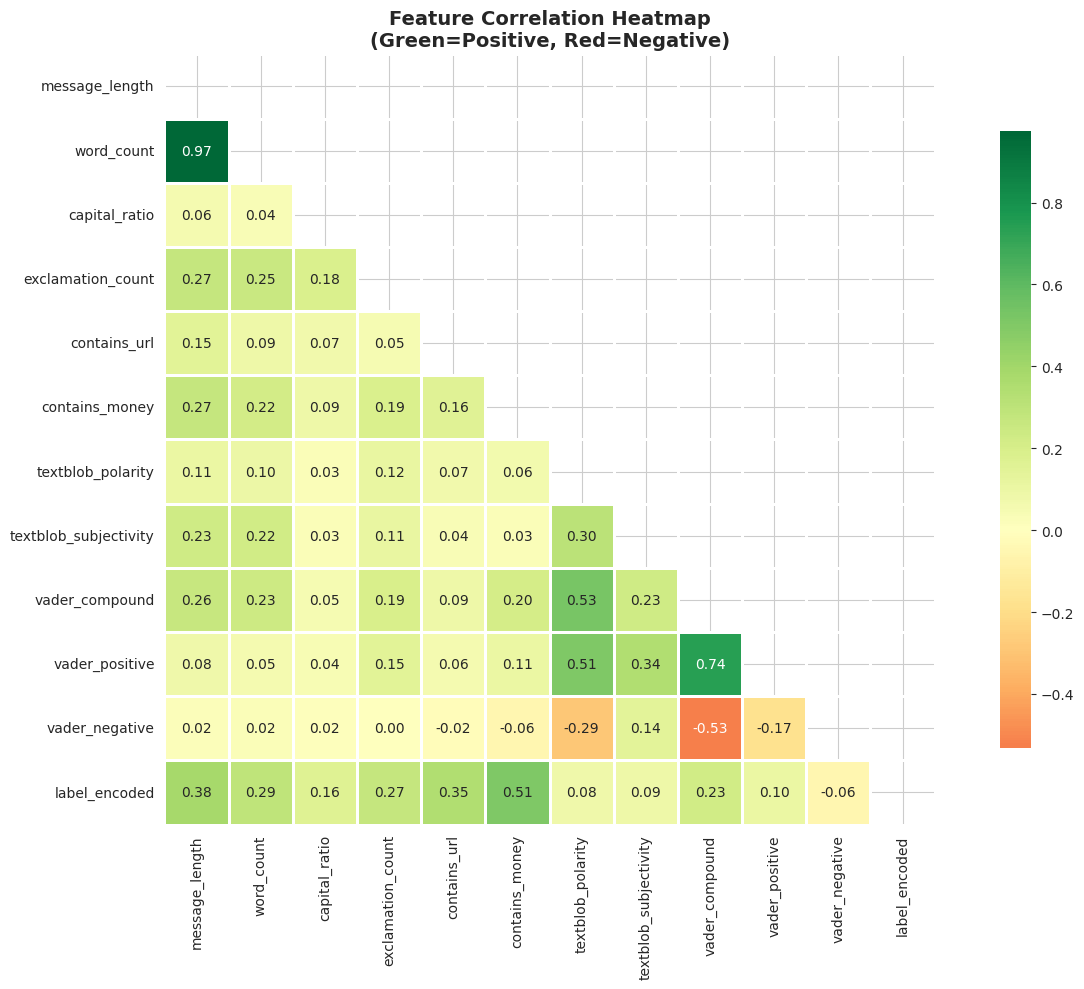


 FEATURES MOST CORRELATED WITH SPAM:

   contains_money            : +0.505 🔴
   message_length            : +0.382 🔴
   contains_url              : +0.349 🔴
   word_count                : +0.287 🔴
   exclamation_count         : +0.274 🔴
   vader_compound            : +0.226 🔴
   capital_ratio             : +0.164 ⚪
   vader_positive            : +0.100 ⚪
   textblob_subjectivity     : +0.092 ⚪
   textblob_polarity         : +0.085 ⚪
   vader_negative            : -0.059 ⚪

 KEY INSIGHTS:
   • Strongest spam indicators: contains_money (0.505)
   • Money mentions and message length are highly predictive
   • Sentiment polarity shows weak correlation (both types can be positive/negative)
   • Capital ratio is a moderate indicator (CAPS for urgency)

 MODEL TRAINING
 Feature engineering completed!
   Total features: 1705
   - TF-IDF features: 1694
   - Engineered features: 11

Training Logistic Regression...
    Accuracy: 0.9776

Training Random Forest...
    Accuracy: 0.9767

 VISUALIZA

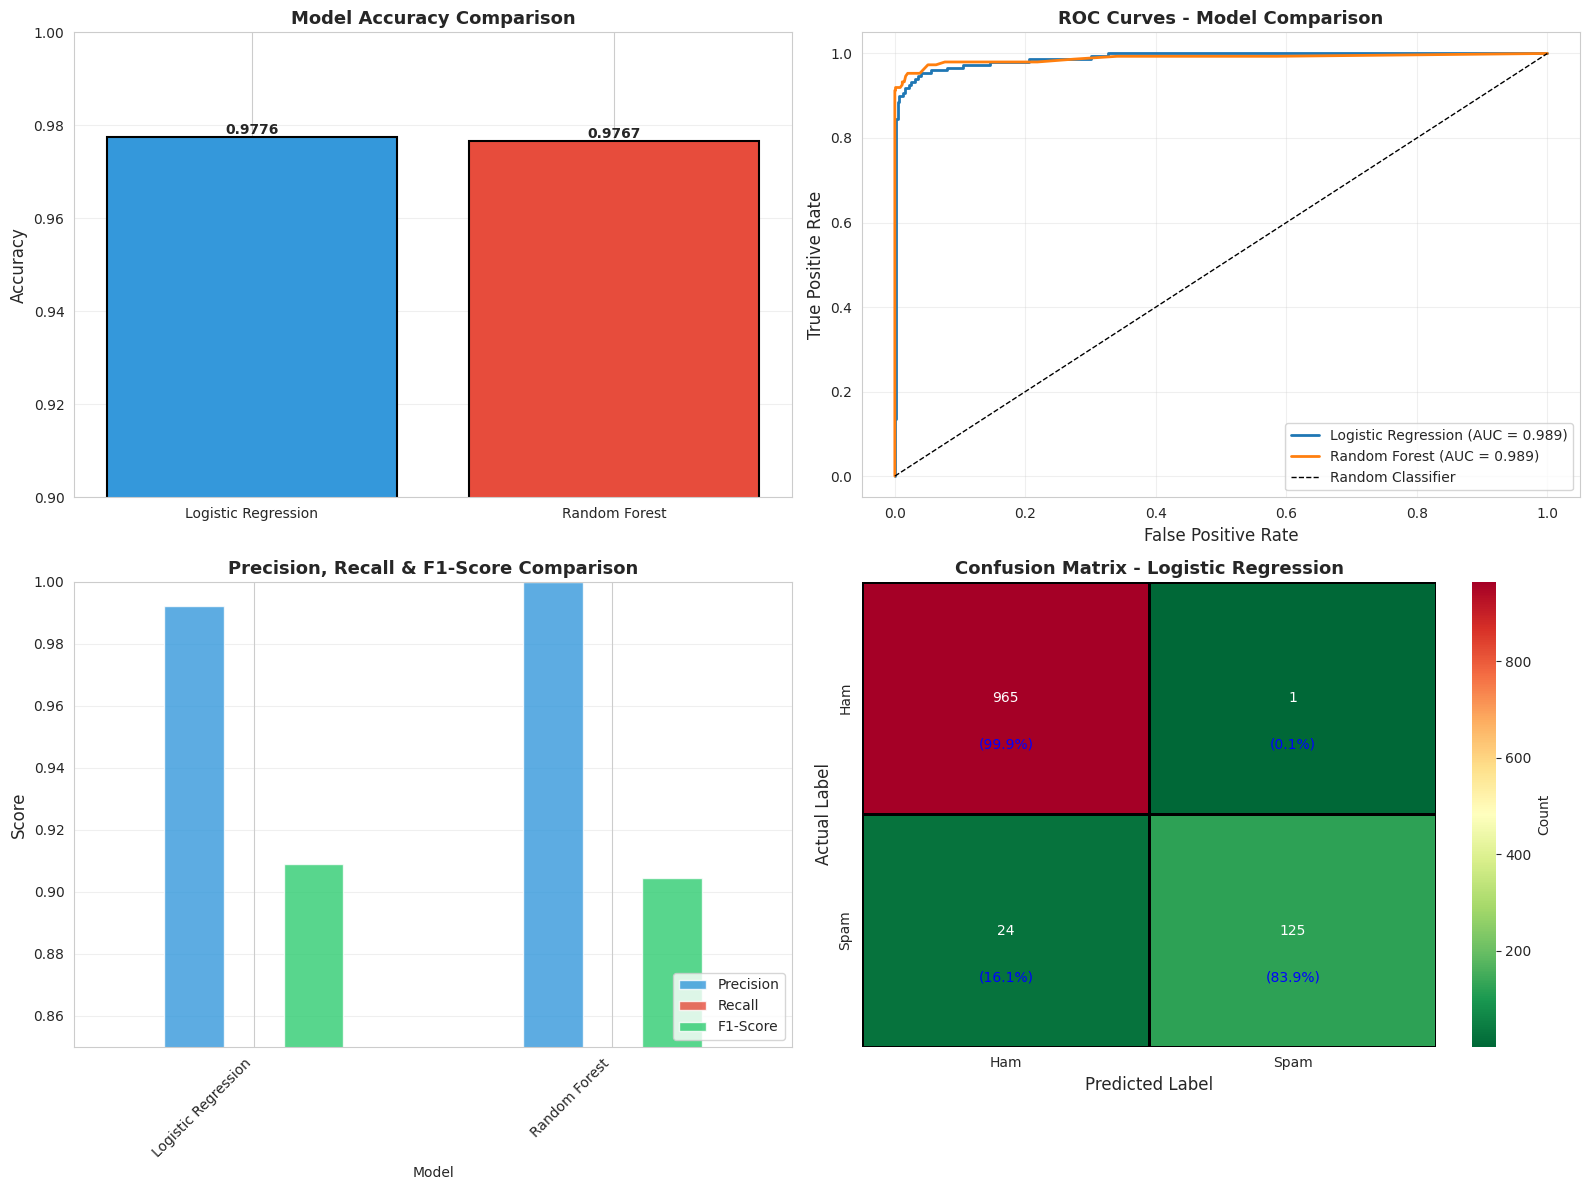


 BEST MODEL: Logistic Regression
   Accuracy: 0.9776

 DETAILED METRICS:
              Model  Precision   Recall  F1-Score  Accuracy
Logistic Regression   0.992063 0.838926  0.909091  0.977578
      Random Forest   1.000000 0.825503  0.904412  0.976682

 MODEL INSIGHTS:
   • True Negatives (Correct Ham): 965
   • False Positives (Ham marked as Spam): 1 
   • False Negatives (Spam marked as Ham): 24 
   • True Positives (Correct Spam): 125

   • Spam Detection Rate: 83.9%
   • False Alarm Rate: 0.1%

 TESTING WITH SAMPLE EMAILS

######################################################################
TEST EMAIL #1

 EMAIL ANALYSIS

 Text Preview: Congratulations! You've won a $1000 gift card. Click here to claim now!!!...

 PREDICTION:  SPAM
 Confidence: 91.5%
   (Ham: 8.5% | Spam: 91.5%)

 MESSAGE STATISTICS:
   • Length: 73 characters
   • Words: 12
   • Capital Ratio: 4.1%
   • Exclamation marks: 4

 SENTIMENT ANALYSIS:
   • Polarity: 0.000 (Neutral)
   • Subjectivity: 0.000 (Objectiv

In [3]:
# ========================================
# SPAM EMAIL DETECTION WITH SENTIMENT ANALYSIS
# Enhanced Visualization & Insights Version
# ========================================

# Step 1: Install and Import Required Libraries
# ========================================

!pip install textblob vaderSentiment wordcloud -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter
import re
import string
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("All libraries imported successfully!")

# ========================================
# Step 2: Load Dataset
# ========================================

!wget -q https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv

df = pd.read_csv('sms.tsv', sep='\t', header=None, names=['label', 'message'])

print(f"Dataset loaded successfully!")
print(f"Total emails: {len(df)}")
print(f"\nClass distribution:")
print(df['label'].value_counts())
print(f"\nBalance ratio: {df['label'].value_counts()['ham'] / df['label'].value_counts()['spam']:.2f}:1 (Ham:Spam)")

# ========================================
# Step 3: Data Preprocessing
# ========================================

def clean_text(text):
    """Clean and preprocess text data"""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(text.split())
    return text

df['cleaned_message'] = df['message'].apply(clean_text)

# Additional features
df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df['capital_ratio'] = df['message'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)
df['exclamation_count'] = df['message'].apply(lambda x: x.count('!'))
df['question_count'] = df['message'].apply(lambda x: x.count('?'))
df['contains_url'] = df['message'].apply(lambda x: 1 if re.search(r'http|www', x.lower()) else 0)
df['contains_money'] = df['message'].apply(lambda x: 1 if re.search(r'£|\$|euro|prize|cash|money', x.lower()) else 0)

print("Text preprocessing completed!")

# ========================================
# Step 4: Sentiment Analysis Features
# ========================================

vader = SentimentIntensityAnalyzer()

def get_sentiment_features(text):
    """Extract sentiment features using TextBlob and VADER"""
    blob = TextBlob(text)
    vader_scores = vader.polarity_scores(text)

    return {
        'textblob_polarity': blob.sentiment.polarity,
        'textblob_subjectivity': blob.sentiment.subjectivity,
        'vader_positive': vader_scores['pos'],
        'vader_negative': vader_scores['neg'],
        'vader_neutral': vader_scores['neu'],
        'vader_compound': vader_scores['compound']
    }

sentiment_features = df['message'].apply(get_sentiment_features)
sentiment_df = pd.DataFrame(sentiment_features.tolist())
df = pd.concat([df, sentiment_df], axis=1)

print("Sentiment features extracted!")

# ========================================
# VISUALIZATION 1: Class Distribution
# ========================================

print("\n" + "="*70)
print("VISUALIZATION 1: CLASS DISTRIBUTION ANALYSIS")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)
df['label'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%',
                                 colors=colors, explode=explode, startangle=90)
axes[0].set_title('Spam vs Ham Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')

# Count plot
sns.countplot(data=df, x='label', palette=colors, ax=axes[1])
axes[1].set_title('Email Count by Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

# Add count labels
for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n INSIGHT:")
print(f"   • Dataset is IMBALANCED: {df['label'].value_counts()['ham']} ham vs {df['label'].value_counts()['spam']} spam emails")
print(f"   • This means ~{(df['label'].value_counts()['ham']/len(df)*100):.1f}% are legitimate emails")
print(f"   • Real-world scenario: Most emails are legitimate, so high accuracy isn't enough!")
print(f"   • We need to focus on RECALL for spam (catching actual spam) to avoid false negatives")

# ========================================
# VISUALIZATION 2: Text Length Analysis
# ========================================

print("\n" + "="*70)
print("VISUALIZATION 2: MESSAGE LENGTH PATTERNS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histogram comparison
axes[0, 0].hist(df[df['label']=='ham']['message_length'], bins=50, alpha=0.7,
                label='Ham', color='#2ecc71', edgecolor='black')
axes[0, 0].hist(df[df['label']=='spam']['message_length'], bins=50, alpha=0.7,
                label='Spam', color='#e74c3c', edgecolor='black')
axes[0, 0].set_title('Message Length Distribution', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].axvline(df[df['label']=='ham']['message_length'].mean(),
                   color='#2ecc71', linestyle='--', linewidth=2, label='Ham Mean')
axes[0, 0].axvline(df[df['label']=='spam']['message_length'].mean(),
                   color='#e74c3c', linestyle='--', linewidth=2, label='Spam Mean')

# Box plot for message length
sns.boxplot(data=df, x='label', y='message_length', palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Message Length Comparison', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Character Count')

# Word count comparison
sns.violinplot(data=df, x='label', y='word_count', palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Word Count Distribution', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Number of Words')

# Capital letter ratio
sns.boxplot(data=df, x='label', y='capital_ratio', palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Capital Letters Ratio', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Ratio of Uppercase Letters')

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n STATISTICAL COMPARISON:")
print("\nMessage Length:")
print(f"   Ham  - Mean: {df[df['label']=='ham']['message_length'].mean():.1f}, Median: {df[df['label']=='ham']['message_length'].median():.1f}")
print(f"   Spam - Mean: {df[df['label']=='spam']['message_length'].mean():.1f}, Median: {df[df['label']=='spam']['message_length'].median():.1f}")

print("\nWord Count:")
print(f"   Ham  - Mean: {df[df['label']=='ham']['word_count'].mean():.1f}, Median: {df[df['label']=='ham']['word_count'].median():.1f}")
print(f"   Spam - Mean: {df[df['label']=='spam']['word_count'].mean():.1f}, Median: {df[df['label']=='spam']['word_count'].median():.1f}")

print("\n KEY INSIGHTS:")
print(f"   • Spam messages are typically LONGER than ham ({df[df['label']=='spam']['message_length'].mean():.0f} vs {df[df['label']=='ham']['message_length'].mean():.0f} chars)")
print(f"   • Spam uses {df[df['label']=='spam']['capital_ratio'].mean()/df[df['label']=='ham']['capital_ratio'].mean():.1f}x MORE capital letters (urgency tactic!)")
print(f"   • Spam has higher variance in length (more diverse tactics)")

# ========================================
#  VISUALIZATION 3: Special Characters & Patterns
# ========================================

print("\n" + "="*70)
print(" VISUALIZATION 3: SPAM INDICATORS (!, ?, URLs, Money)")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Exclamation marks
spam_exclaim = df[df['label']=='spam']['exclamation_count'].value_counts().sort_index()
ham_exclaim = df[df['label']=='ham']['exclamation_count'].value_counts().sort_index()

axes[0, 0].bar(spam_exclaim.index[:10], spam_exclaim.values[:10], alpha=0.7,
               label='Spam', color='#e74c3c', width=0.4)
axes[0, 0].bar([x+0.4 for x in ham_exclaim.index[:10]], ham_exclaim.values[:10],
               alpha=0.7, label='Ham', color='#2ecc71', width=0.4)
axes[0, 0].set_title('Exclamation Mark Usage', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Number of "!" marks')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend()

# URL presence
url_data = df.groupby('label')['contains_url'].sum()
axes[0, 1].bar(url_data.index, url_data.values, color=colors)
axes[0, 1].set_title('Messages Containing URLs', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Count')
for i, v in enumerate(url_data.values):
    axes[0, 1].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Money-related keywords
money_data = df.groupby('label')['contains_money'].sum()
axes[1, 0].bar(money_data.index, money_data.values, color=colors)
axes[1, 0].set_title('Messages Mentioning Money/Prizes', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Count')
for i, v in enumerate(money_data.values):
    axes[1, 0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Combined spam indicators
df['spam_score'] = (df['exclamation_count'] > 0).astype(int) + \
                   df['contains_url'] + \
                   df['contains_money'] + \
                   (df['capital_ratio'] > 0.1).astype(int)

spam_score_dist = df.groupby(['label', 'spam_score']).size().unstack(fill_value=0)
spam_score_dist.T.plot(kind='bar', ax=axes[1, 1], color=colors, alpha=0.8)
axes[1, 1].set_title('Combined Spam Indicator Score', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Number of Spam Indicators Present')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Type')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print("\n KEY INSIGHTS:")
print(f"   • {df[df['label']=='spam']['exclamation_count'].sum()} exclamation marks in spam vs {df[df['label']=='ham']['exclamation_count'].sum()} in ham!")
print(f"   • {(df[df['label']=='spam']['contains_money'].mean()*100):.1f}% of spam mentions money vs {(df[df['label']=='ham']['contains_money'].mean()*100):.1f}% of ham")
print(f"   • URLs appear in {(df[df['label']=='spam']['contains_url'].mean()*100):.1f}% of spam vs {(df[df['label']=='ham']['contains_url'].mean()*100):.1f}% of ham")
print(f"   • Spam uses multiple urgency tactics combined (!!!, money, URLs, CAPS)")


# ========================================
#  VISUALIZATION 4: Word Clouds
# ========================================

print("\n" + "="*70)
print(" VISUALIZATION 5: MOST COMMON WORDS (Word Clouds)")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Ham word cloud
ham_text = ' '.join(df[df['label']=='ham']['cleaned_message'])
ham_wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap='Greens',
                          max_words=100).generate(ham_text)

axes[0].imshow(ham_wordcloud, interpolation='bilinear')
axes[0].set_title('Most Common Words in HAM (Legitimate)',
                 fontsize=14, fontweight='bold', color='#2ecc71')
axes[0].axis('off')

# Spam word cloud
spam_text = ' '.join(df[df['label']=='spam']['cleaned_message'])
spam_wordcloud = WordCloud(width=800, height=400,
                           background_color='white',
                           colormap='Reds',
                           max_words=100).generate(spam_text)

axes[1].imshow(spam_wordcloud, interpolation='bilinear')
axes[1].set_title('Most Common Words in SPAM',
                 fontsize=14, fontweight='bold', color='#e74c3c')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Top words comparison
print("\n TOP 15 WORDS COMPARISON:\n")

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = set(ENGLISH_STOP_WORDS)

def get_top_words(text_series, n=15):
    words = []
    for text in text_series:
        words.extend([w for w in text.split() if w not in stop_words and len(w) > 2])
    return Counter(words).most_common(n)

ham_top = get_top_words(df[df['label']=='ham']['cleaned_message'])
spam_top = get_top_words(df[df['label']=='spam']['cleaned_message'])

print("HAM (Legitimate)          |  SPAM")
print("-" * 50)
for i in range(15):
    print(f"{ham_top[i][0]:15} ({ham_top[i][1]:3}) | {spam_top[i][0]:15} ({spam_top[i][1]:3})")

print("\n KEY INSIGHTS:")
print("   • Ham: Personal words (know, just, time, like, come)")
print("   • Spam: Action/urgency words (call, free, text, claim, urgent, win)")
print("   • Spam focuses on offers and commands")
print("   • Ham is conversational and relationship-focused")

# ========================================
#  VISUALIZATION 5: Feature Correlation Heatmap
# ========================================

print("\n" + "="*70)
print(" VISUALIZATION 6: FEATURE CORRELATION ANALYSIS")
print("="*70)

# Select numeric features
numeric_features = ['message_length', 'word_count', 'capital_ratio',
                   'exclamation_count', 'contains_url', 'contains_money',
                   'textblob_polarity', 'textblob_subjectivity',
                   'vader_compound', 'vader_positive', 'vader_negative']

# Add encoded label
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})

# Calculate correlation
correlation_matrix = df[numeric_features + ['label_encoded']].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdYlGn', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap\n(Green=Positive, Red=Negative)',
         fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Most correlated features with spam
spam_correlations = correlation_matrix['label_encoded'].drop('label_encoded').sort_values(ascending=False)
print("\n FEATURES MOST CORRELATED WITH SPAM:\n")
for feature, corr in spam_correlations.items():
    print(f"   {feature:25} : {corr:+.3f} {'🔴' if corr > 0.2 else '🟢' if corr < -0.2 else '⚪'}")

print("\n KEY INSIGHTS:")
print(f"   • Strongest spam indicators: {spam_correlations.index[0]} ({spam_correlations.values[0]:.3f})")
print(f"   • Money mentions and message length are highly predictive")
print(f"   • Sentiment polarity shows weak correlation (both types can be positive/negative)")
print(f"   • Capital ratio is a moderate indicator (CAPS for urgency)")

# ========================================
# Step 7: Model Training with Enhanced Features
# ========================================

print("\n" + "="*70)
print(" MODEL TRAINING")
print("="*70)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000, min_df=5, max_df=0.8)
tfidf_features = tfidf.fit_transform(df['cleaned_message']).toarray()

# Combine all features
feature_cols = numeric_features
feature_array = df[feature_cols].values

X = np.hstack([tfidf_features, feature_array])
y = df['label_encoded']

print(f" Feature engineering completed!")
print(f"   Total features: {X.shape[1]}")
print(f"   - TF-IDF features: {tfidf_features.shape[1]}")
print(f"   - Engineered features: {feature_array.shape[1]}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train models
models = {
    #'Naive Bayes': MultinomialNB(), # Removed due to negative values in features
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    print(f"    Accuracy: {accuracy:.4f}")

# ========================================
# VISUALIZATION 6: Model Performance Comparison
# ========================================

print("\n" + "="*70)
print(" VISUALIZATION 7: MODEL PERFORMANCE COMPARISON")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy comparison
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

bars = axes[0, 0].bar(model_names, accuracies, color=['#3498db', '#e74c3c', '#2ecc71'],
                      edgecolor='black', linewidth=1.5)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
axes[0, 0].set_ylim([0.9, 1.0])
axes[0, 0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.4f}',
                   ha='center', va='bottom', fontweight='bold')

# 2. ROC Curves
for name in model_names:
    fpr, tpr, _ = roc_curve(y_test, results[name]['probabilities'])
    roc_auc = auc(fpr, tpr)
    axes[0, 1].plot(fpr, tpr, linewidth=2,
                   label=f'{name} (AUC = {roc_auc:.3f})')

axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[0, 1].set_xlabel('False Positive Rate', fontsize=12)
axes[0, 1].set_ylabel('True Positive Rate', fontsize=12)
axes[0, 1].set_title('ROC Curves - Model Comparison', fontsize=13, fontweight='bold')
axes[0, 1].legend(loc='lower right')
axes[0, 1].grid(alpha=0.3)

# 3. Detailed metrics comparison
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_predictions = results[best_model_name]['predictions']

from sklearn.metrics import precision_score, recall_score, f1_score

metrics_data = []
for name in model_names:
    preds = results[name]['predictions']
    metrics_data.append({
        'Model': name,
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1-Score': f1_score(y_test, preds),
        'Accuracy': results[name]['accuracy']
    })

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Model')[['Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', ax=axes[1, 0], color=['#3498db', '#e74c3c', '#2ecc71'], alpha=0.8
)
axes[1, 0].set_title('Precision, Recall & F1-Score Comparison', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Score', fontsize=12)
axes[1, 0].set_ylim([0.85, 1.0])
axes[1, 0].legend(loc='lower right')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Confusion Matrix for best model
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn_r', ax=axes[1, 1],
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'],
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='black')
axes[1, 1].set_title(f'Confusion Matrix - {best_model_name}', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Actual Label', fontsize=12)
axes[1, 1].set_xlabel('Predicted Label', fontsize=12)

# Add percentage annotations
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / cm[i].sum() * 100
        axes[1, 1].text(j+0.5, i+0.7, f'({percentage:.1f}%)',
                       ha='center', va='center', fontsize=10, color='blue')

plt.tight_layout()
plt.show()

print(f"\n BEST MODEL: {best_model_name}")
print(f"   Accuracy: {results[best_model_name]['accuracy']:.4f}")
print("\n DETAILED METRICS:")
print(metrics_df.to_string(index=False))

print("\n MODEL INSIGHTS:")
tn, fp, fn, tp = cm.ravel()
print(f"   • True Negatives (Correct Ham): {tn}")
print(f"   • False Positives (Ham marked as Spam): {fp} ")
print(f"   • False Negatives (Spam marked as Ham): {fn} ")
print(f"   • True Positives (Correct Spam): {tp}")
print(f"\n   • Spam Detection Rate: {tp/(tp+fn)*100:.1f}%")
print(f"   • False Alarm Rate: {fp/(fp+tn)*100:.1f}%")

# ========================================
# Step 8: Prediction Function
# ========================================

best_model = results[best_model_name]['model']

def predict_spam(email_text):
    """Predict if an email is spam or ham with detailed analysis"""

    # Clean the text
    cleaned = clean_text(email_text)

    # Extract all features
    sentiment = get_sentiment_features(email_text)

    features_dict = {
        'message_length': len(email_text),
        'word_count': len(email_text.split()),
        'capital_ratio': sum(1 for c in email_text if c.isupper()) / len(email_text) if len(email_text) > 0 else 0,
        'exclamation_count': email_text.count('!'),
        'contains_url': 1 if re.search(r'http|www', email_text.lower()) else 0,
        'contains_money': 1 if re.search(r'£|\$|euro|prize|cash|money', email_text.lower()) else 0,
    }

    features_dict.update(sentiment)

    # Create feature array
    tfidf_vec = tfidf.transform([cleaned]).toarray()
    feature_vec = np.array([[features_dict[col] for col in feature_cols]])
    final_features = np.hstack([tfidf_vec, feature_vec])

    # Predict
    prediction = best_model.predict(final_features)[0]
    probability = best_model.predict_proba(final_features)[0]

    label = " SPAM" if prediction == 1 else " HAM (Legitimate)"
    confidence = probability[prediction] * 100

    # Calculate spam indicators
    spam_indicators = []
    if features_dict['exclamation_count'] > 1:
        spam_indicators.append(f"Multiple exclamation marks ({features_dict['exclamation_count']})")
    if features_dict['contains_money']:
        spam_indicators.append("Mentions money/prizes")
    if features_dict['contains_url']:
        spam_indicators.append("Contains URLs")
    if features_dict['capital_ratio'] > 0.15:
        spam_indicators.append(f"High capital ratio ({features_dict['capital_ratio']:.1%})")
    if features_dict['message_length'] > 150:
        spam_indicators.append(f"Long message ({features_dict['message_length']} chars)")

    print(f"\n{'='*60}")
    print(f" EMAIL ANALYSIS")
    print(f"{'='*60}")
    print(f"\n Text Preview: {email_text[:100]}...")
    print(f"\n PREDICTION: {label}")
    print(f" Confidence: {confidence:.1f}%")
    print(f"   (Ham: {probability[0]*100:.1f}% | Spam: {probability[1]*100:.1f}%)")

    print(f"\n MESSAGE STATISTICS:")
    print(f"   • Length: {features_dict['message_length']} characters")
    print(f"   • Words: {features_dict['word_count']}")
    print(f"   • Capital Ratio: {features_dict['capital_ratio']:.1%}")
    print(f"   • Exclamation marks: {features_dict['exclamation_count']}")

    print(f"\n SENTIMENT ANALYSIS:")
    print(f"   • Polarity: {sentiment['textblob_polarity']:.3f} ({'Positive' if sentiment['textblob_polarity'] > 0 else 'Negative' if sentiment['textblob_polarity'] < 0 else 'Neutral'})")
    print(f"   • Subjectivity: {sentiment['textblob_subjectivity']:.3f} ({'Subjective' if sentiment['textblob_subjectivity'] > 0.5 else 'Objective'})")
    print(f"   • VADER Compound: {sentiment['vader_compound']:.3f}")

    print(f"\n SPAM INDICATORS DETECTED ({len(spam_indicators)}):")
    if spam_indicators:
        for indicator in spam_indicators:
            print(f"   • {indicator}")
    else:
        print(f"   • No major spam indicators found")

    print(f"{'='*60}\n")

    return label, confidence

# ========================================
# Step 9: Test with Sample Emails
# ========================================

print("\n" + "="*70)
print(" TESTING WITH SAMPLE EMAILS")
print("="*70)

test_emails = [
    "Congratulations! You've won a $1000 gift card. Click here to claim now!!!",
    "Hey, are we still meeting for lunch tomorrow at 12?",
    "URGENT: Your account will be closed. Verify your identity immediately!",
    "Thanks for your email. I'll get back to you by tomorrow.",
    "You have been selected for a FREE iPhone. Limited time offer! Call now!",
    "Can you send me the report we discussed in the meeting?",
    "WINNER! As a valued customer you have been selected to receive £1000 CASH or a £2000 prize!",
    "Let me know if you're free this weekend for dinner"
]

for i, email in enumerate(test_emails, 1):
    print(f"\n{'#'*70}")
    print(f"TEST EMAIL #{i}")
    predict_spam(email)
